In [28]:
import pandas as pd
import matplotlib
import ast
import numpy as np
from scipy.signal import stft, welch, spectrogram, get_window, periodogram


csv_file = pd.read_csv('./../data/basic_mdurance-test.csv', sep=';')
column_1 = csv_file['rms_1_(µV)']
rms_csv = column_1.to_list() 

csv_file_2 = pd.read_csv('./../data/advanced_mdurance_1.csv', sep=';')
raw_csv = csv_file_2['emg_muscle_1_(µV)']
angles_csv = csv_file_2['angles_1']

def get_rms(rms_csv):
    rms_list = ast.literal_eval(rms_csv)
    result = []
    for value in rms_csv:
        replaced_value = value.replace(',', '.')
        result.append(float(replaced_value))

    return result

def get_raw(raw_csv):
    raw = raw_csv.replace('nan', "'0,0'")

    raw_list = ast.literal_eval(raw)
    result = []
    for value in raw_csv:
        replaced_value = value.replace(',', '.')
        result.append(float(replaced_value))

    return result



rms = get_rms(rms_csv)
emg = raw_csv.to_list()
angles = angles_csv.to_list()

ValueError: malformed node or string: ['5,037', '2,107', '2,148', '2,204', '2,183', '2,222', '2,35', '5,702', '5,673', '2,17', '2,137', '5,421', '5,536', '5,494', '5,355', '2,191', '8,491', '15,254', '22,143', '21,204', '11,354', '6,618', '9,314', '8,656', '119,507', '194,168', '207,848', '221,057', '228,064', '188,928', '190,967', '175,077', '181,647', '235,369', '204,612', '183,097', '217,216', '217,703', '234,926', '252,031', '188,317', '128,33', '119,624', '90,859', '38,59', '14,311', '10,123', '4,544', '5,261', '5,313', '4,187', '3,325', '2,594', '2,441', '2,42', '2,352', '2,401', '10,914', '16,517', '13,024', '3,308', '3,224', '3,102', '2,509', '2,647', '2,454', '2,129', '2,284', '2,405', '2,275', '2,191', '2,298', '2,246', '2,178', '2,213', '2,303', '2,344', '3,97', '4,554', '3,203', '2,244', '2,09', '2,075', '2,152', '2,143', '2,146', '2,169', '2,216', '2,114', '2,148', '2,242', '2,216', '2,181', '2,064', '2,108', '2,136', '2,035', '2,226', '2,858', '2,675', '2,056', '2,047', '4,32', '4,359', '2,498', '2,488', '2,031', '2,046', '2,737', '2,968', '3,033', '3,158', '3,581', '4,506', '5,751', '5,105', '2,579', '2,156', '2,281', '2,08', '2,002', '2,149', '2,088', '1,955', '2,023', '2,151', '2,135', '2,012', '1,991', '2,025', '2,172', '2,2', '2,031', '2,05', '2,095', '2,109', '2,088', '4,146', '15,252', '21,034', '22,8', '22,524', '18,355', '16,49', '18,778', '17,648', '10,992', '11,368', '24,229', '28,508', '30,12', '27,229', '13,828', '5,624', '3,069', '2,675', '2,344', '2,905', '2,919', '2,258', '2,149', '1,949', '1,941', '2,025', '2,033', '1,923', '1,988', '2,251', '2,442']

In [4]:
df_rms = pd.DataFrame(rms)
df_rms.plot()

df_rom = pd.DataFrame(angles)
df_rom.plot()

TypeError: no numeric data to plot

In [5]:
fft = np.fft.fft(emg[:len(emg) // 9])
fft = np.abs(fft[:len(fft) // 2])
             
fft_cropped = np.fft.fft(emg, 1024)
fft_cropped = np.abs(fft_cropped[:len(fft_cropped) // 2])

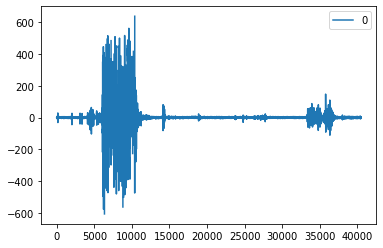

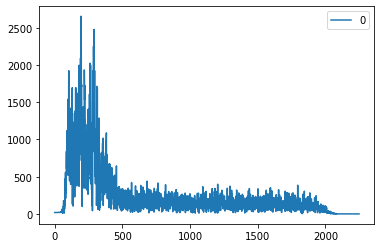

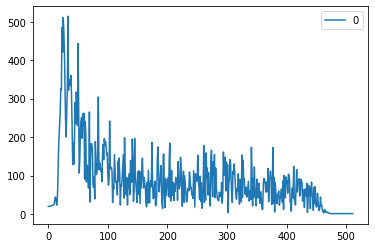

In [6]:
df_emg = pd.DataFrame(emg)
df_emg.plot()

df_fft = pd.DataFrame(fft)
df_fft.plot()

df_fft_cropped = pd.DataFrame(fft_cropped)
df_fft_cropped.plot()

In [7]:
f, Pxx = welch(emg[:len(emg)//8], fs=1024, window="hamming",scaling="spectrum")

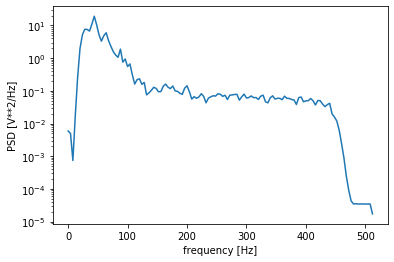

In [8]:
import matplotlib.pyplot as plt
plt.semilogy(f, Pxx)
#plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [9]:
def getWelchWindows(emg, frequency=1024, emg_window=256):
    
    welch_data = []
    #window = float(frequency) * float(emg_window) * 2
    window = emg_window
    start = 0
    end = int(window)
    increment = int(window / 2)
    sample = emg[start:end]
    sample_len = len(sample)
    
    while sample_len:
        welch_sample = dict()
        f, Pxx = welch(np.asarray(sample), fs=1024, window="hamming", nperseg=256)
        welch_sample['f'] = f
        welch_sample['Pxx'] = Pxx
        welch_data.append(welch_sample)
        start += increment
        end += increment
        sample = emg[start:end]
        sample_len = len(sample)
    return welch_data

In [10]:
fft_cropped_windows = getWelchWindows(fft_cropped)

D:\Anaconda3\envs\AnacondaTFG\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 128, using nperseg = 128
  .format(nperseg, input_length))


In [11]:
df_rms[0]

0      5037
1      2107
2      2148
3      2204
4      2183
       ... 
164    2033
165    1923
166    1988
167    2251
168    2442
Name: 0, Length: 169, dtype: object

In [12]:
def get_sections(df):
    result = []
    threshold = float(df.max()*0.1)
    start = df[0][0]
    in_section = False
    section = []
    index=0
    
    for index, row in df.iterrows():
        if row[0] > threshold and not in_section:
            result.append(index)
            in_section = True
        if row[0] < threshold and in_section:
            result.append(index)
            in_section = False
        index += 1
        
    return result

In [13]:
sections = get_sections(df_rms)

TypeError: '>' not supported between instances of 'str' and 'float'

In [14]:
rom_points_per_rms = round(len(df_rom[0])/len(df_rms[0]))

df_rms = pd.DataFrame(rms)
df_rms.plot()
plt.axhline(y=float(df_rms.max()*0.1), color='g', linestyle='--', label='vline1.5custom')
for value in sections:
    plt.axvline(x=value, color='r', linestyle='--', label='vline1.5custom')
    
df_rom = pd.DataFrame(angles)
df_rom.plot()
for value in sections:
    plt.axvline(x=value*rom_points_per_rms, color='r', linestyle='--', label='vline1.5custom')

NameError: name 'df_rom' is not defined

In [15]:
sections

NameError: name 'sections' is not defined

In [16]:
def get_highest_value_per_section(df_rms, start_section, end_section):
    array = []
    while start_section < end_section:
        array.append(df_rms[0][start_section])
        start_section += 1
    
    df = pd.DataFrame(array)
    maximum = df[0].max()
    return maximum

In [17]:
max = get_highest_value_per_section(df_rms, 24, 45)

In [18]:
max

'90859'

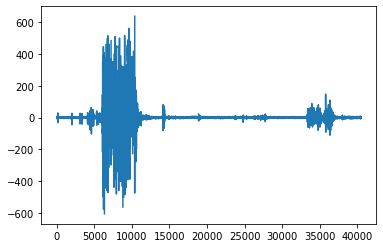

In [19]:
raw_csv.plot()

In [20]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=1):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


y = butter_bandpass_filter(raw_csv, 20, 450, 1025, order=5)

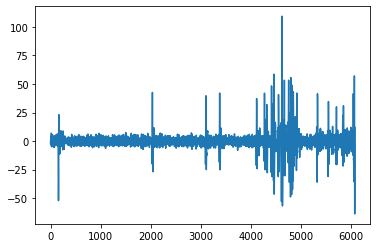

In [21]:
plt.plot( y)

In [22]:
raw_csv[0: 2000]

0      -0.774
1      -3.924
2      -4.780
3      -1.128
4      -5.596
        ...  
1995    1.667
1996   -0.768
1997   -0.644
1998    0.252
1999   -2.965
Name: emg_muscle_1_(µV), Length: 2000, dtype: float64

In [27]:
ast.literal_eval(rms)

ValueError: malformed node or string: ['5037', '2107', '2148', '2204', '2183', '2222', '01/02/35', '5702', '5673', '01/02/17', '2137', '5421', '5536', '5494', '5355', '2191', '8491', '15254', '22143', '21204', '11354', '6618', '9314', '8656', '119507', '194168', '207848', '221057', '228064', '188928', '190967', '175077', '181647', '235369', '204612', '183097', '217216', '217703', '234926', '252031', '188317', '128.33', '119624', '90859', '38.59', '14311', '10123', '4544', '5261', '5313', '4187', '3325', '2594', '2441', '01/02/42', '2352', '2401', '10914', '16517', '13024', '3308', '3224', '3102', '2509', '2647', '2454', '2129', '2284', '2405', '2275', '2191', '2298', '2246', '2178', '2213', '2303', '2344', '01/03/97', '4554', '3203', '2244', '02/09/20', '2075', '2152', '2143', '2146', '2169', '2216', '2114', '2148', '2242', '2216', '2181', '2064', '2108', '2136', '2035', '2226', '2858', '2675', '2056', '2047', '01/04/32', '4359', '2498', '2488', '2031', '2046', '2737', '2968', '3033', '3158', '3581', '4506', '5751', '5105', '2579', '2156', '2281', '02/08/20', '2002', '2149', '2088', '1955', '2023', '2151', '2135', '2012', '1991', '2025', '2172', '02/02/20', '2031', '02/05/20', '2095', '2109', '2088', '4146', '15252', '21034', '22/08/20', '22524', '18355', '16.49', '18778', '17648', '10992', '11368', '24229', '28508', '30/12/20', '27229', '13828', '5624', '3069', '2675', '2344', '2905', '2919', '2258', '2149', '1949', '1941', '2025', '2033', '1923', '1988', '2251', '2442']